In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
data = pd.read_csv('final_internship_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
data

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,0.711514,-1.290951,0.711371,1,18,7,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,0.710670,-1.291708,0.710540,1,12,13,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,0.710796,-1.289737,0.710366,1,0,25,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,0.711335,-1.291023,0.711480,6,12,12,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [5]:
data.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
column_list = data.columns.values.tolist()
for column_name in column_list:
      print(data[column_name].unique())

['KHVrEVlD' 'lPxIuEri' 'gsVN8JLS' ... 'QZIMcpLZ' 'AD72Uwmn' 'qGKn4Um5']
['Kimberly Adams' 'Justin Tapia' 'Elizabeth Lopez' ... 'Monique Wade'
 'Wanda Parks' 'Dillon Jackson']
['Amy Butler' 'Hannah Zimmerman' 'Amanda Jackson' ... 'Gabriel Coleman'
 'Larry Richards' 'Lonnie Santana']
['Very Good' 'Excellent' 'Bad' 'Good']
['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
['Congested Traffic' 'Flow Traffic' 'Dense Traffic']
['2009-06-15 17:26:21.0000001' '2010-01-05 16:52:16.0000002'
 '2011-08-18 00:35:00.00000049' ... '2014-08-25 00:22:20.0000001'
 '2015-01-12 12:17:32.0000001' '2010-04-12 23:46:58.0000002']
[ 4.5  16.9   5.7  ... 45.58 70.75 71.7 ]
['2009-06-15 17:26:21' '2010-01-05 16:52:16' '2011-08-18 00:35:00' ...
 '2014-08-25 00:22:20' '2015-01-12 12:17:32' '2010-04-12 23:46:58']
[-1.28882636 -1.29182374 -1.29124237 ...  0.71099734 -1.29036613
 -1.28932245]
[0.71072109 0.71054628 0.71141837 ... 0.71004034 0.7113025  0.71067029]
[-1.28877922 -1.2911818  -1.29139079 ...  0.71093809 -1.2876

In [9]:
data.columns = [col.replace(" ", "_") for col in data.columns]

In [10]:
data.columns

Index(['User_ID', 'User_Name', 'Driver_Name', 'Car_Condition', 'Weather',
       'Traffic_Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [11]:
data.drop('User_ID',axis=1, inplace=True)
data.drop('User_Name',axis=1, inplace=True)
data.drop('Driver_Name',axis=1, inplace=True)

In [12]:
data.drop('key',axis=1, inplace=True)
data.drop('pickup_datetime',axis=1, inplace=True)

In [13]:
data.columns

Index(['Car_Condition', 'Weather', 'Traffic_Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [14]:
column_list = data.columns.values.tolist()
for column_name in column_list:
      print(data[column_name].unique())

['Very Good' 'Excellent' 'Bad' 'Good']
['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
['Congested Traffic' 'Flow Traffic' 'Dense Traffic']
[ 4.5  16.9   5.7  ... 45.58 70.75 71.7 ]
[-1.28882636 -1.29182374 -1.29124237 ...  0.71099734 -1.29036613
 -1.28932245]
[0.71072109 0.71054628 0.71141837 ... 0.71004034 0.7113025  0.71067029]
[-1.28877922 -1.2911818  -1.29139079 ...  0.71093809 -1.28763812
 -1.28973692]
[0.7105633  0.71178025 0.71123148 ... 0.70976671 0.7100663  0.71102766]
[1 2 3 6 5 4 0]
[17 16  0  4  7  9 20 13  1 11 19 12 14 18 15  6 21 23  3  8 10  2 22  5]
[15  5 18 21  9  6 20  4  3  2  8 24 23 19 22  7 12 10 28 11 29 31  1 14
 16 17 27 25 30 26 13]
[ 6  1  8  4  3 11 12  9  7  2  5 10]
[0 1 3 5 2 6 4]
[2009 2010 2011 2012 2013 2014 2015]
[20.2658404  44.66767853 43.59768614 ... 31.78010759 42.29291359
 38.82296797]
[55.17604587 31.83235801 33.71208238 ... 38.96093047 36.38281329
 31.51759167]
[14.34261093 23.13077498 19.86528888 ... 19.70821449 17.22716591
 23.08742741]
[34.54

In [15]:
def get_season(arg): 
    if arg in [12, 1, 2]:
        return "Winter"
    elif arg in [3, 4, 5]:
        return "Spring"
    elif arg in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"
    
data['pickup_season'] = data['month'].apply(get_season)
data

,Car_Condition,Weather,Traffic_Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_season
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,Summer
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,Winter
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,Summer
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,Spring
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,7,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706,Spring
499996,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,13,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931,Autumn
499997,Bad,rainy,Flow Traffic,25.0,-1.291262,0.710796,-1.289737,0.710366,1,0,25,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251,Summer
499998,Good,stormy,Congested Traffic,6.5,-1.291101,0.711335,-1.291023,0.711480,6,12,12,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817,Winter


In [16]:
def get_dayperiod(arg): 
    if arg > 5 and arg < 12:
        return "Morning"
    elif arg >= 12 and arg < 17:
        return "Afternoon"
    elif arg >= 17 and arg < 22:
        return "Evenning"
    else: # 22 -> 5
        return "Night"
    
data['pickup_period'] = data['hour'].apply(get_dayperiod)
data

,Car_Condition,Weather,Traffic_Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_season,pickup_period
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,Summer,Evenning
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,Winter,Afternoon
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,Summer,Night
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,Spring,Night
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,Spring,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,7,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706,Spring,Evenning
499996,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,13,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931,Autumn,Afternoon
499997,Bad,rainy,Flow Traffic,25.0,-1.291262,0.710796,-1.289737,0.710366,1,0,25,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251,Summer,Night
499998,Good,stormy,Congested Traffic,6.5,-1.291101,0.711335,-1.291023,0.711480,6,12,12,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817,Winter,Afternoon


In [17]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916069,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


<h4># fare_amout < 0 & fare_amount == 500<br>
# passenger_count = 0 </h4>

In [19]:
drop_fare_indices = data[data['fare_amount'] <= 0].index
data.drop(drop_fare_indices, axis=0, inplace=True)
data.reset_index(inplace=True, drop=True)

In [20]:
data['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4, 0], dtype=int64)

In [21]:
drop_count_index = data[data['passenger_count'] <= 0].index
data.drop(drop_count_index, axis=0, inplace=True)
data.reset_index(inplace=True, drop=True)


In [22]:
df = data[
    (data['pickup_longitude'] >= -180) & (data['pickup_longitude'] <= 180)
    &
    (data['dropoff_longitude'] >= -180) & (data['dropoff_longitude'] <= 180)
    &
    (data['pickup_latitude'] >= -90) & (data['pickup_latitude'] <= 90)
    &
    (data['dropoff_latitude'] >= -90) & (data['dropoff_latitude'] <= 90)
    ]
df

,Car_Condition,Weather,Traffic_Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_season,pickup_period
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,Summer,Evenning
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,Winter,Afternoon
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,Summer,Night
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,Spring,Night
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,Spring,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498164,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,7,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706,Spring,Evenning
498165,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,13,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931,Autumn,Afternoon
498166,Bad,rainy,Flow Traffic,25.0,-1.291262,0.710796,-1.289737,0.710366,1,0,25,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251,Summer,Night
498167,Good,stormy,Congested Traffic,6.5,-1.291101,0.711335,-1.291023,0.711480,6,12,12,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817,Winter,Afternoon


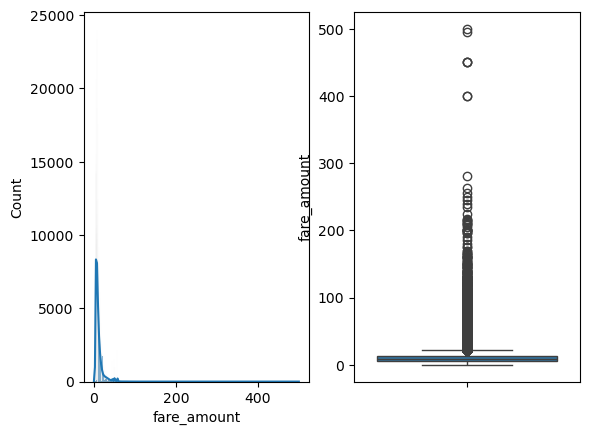

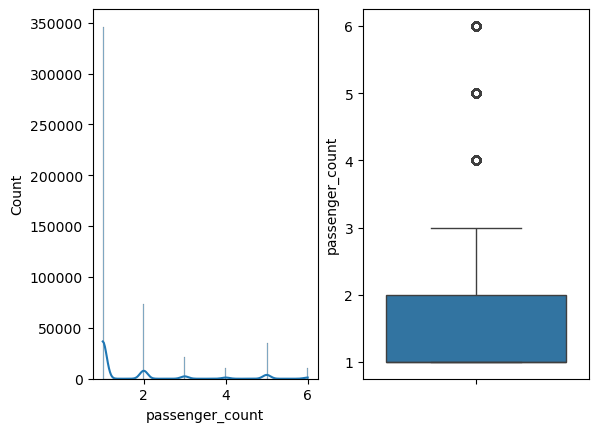

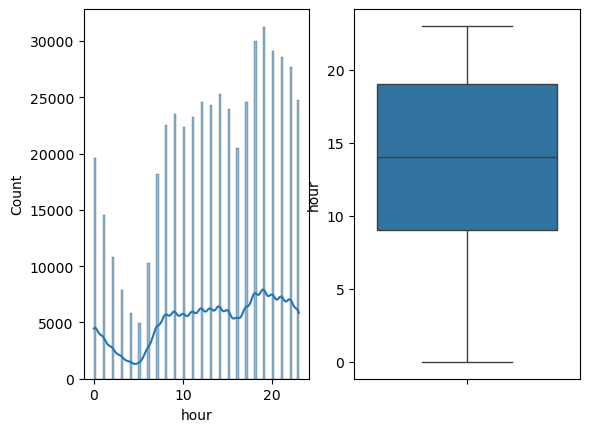

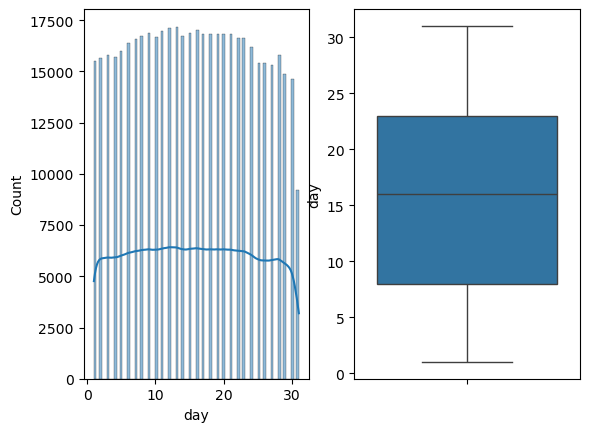

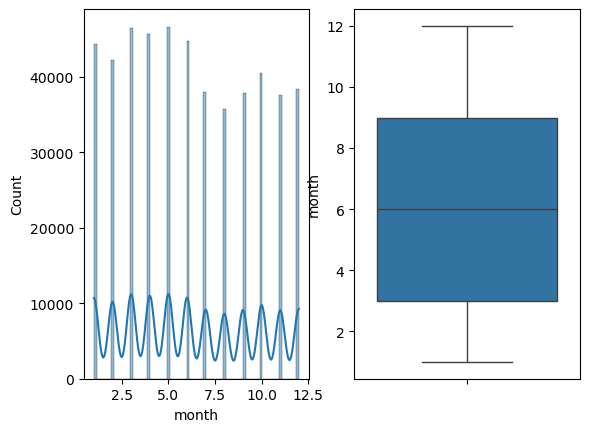

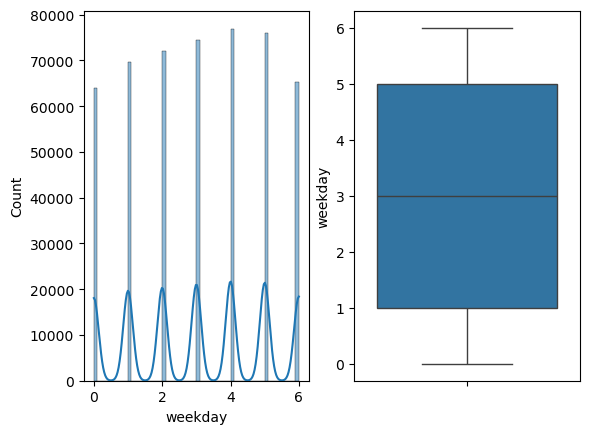

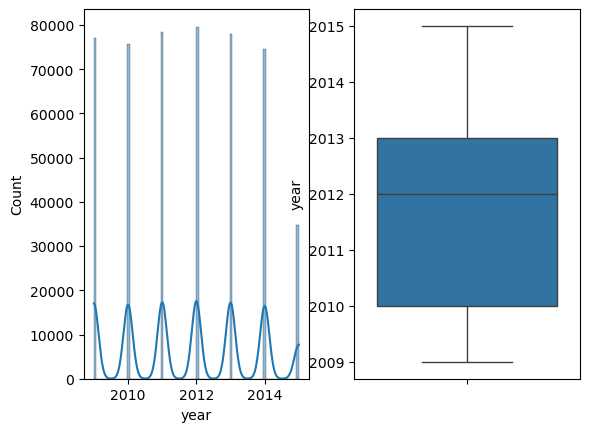

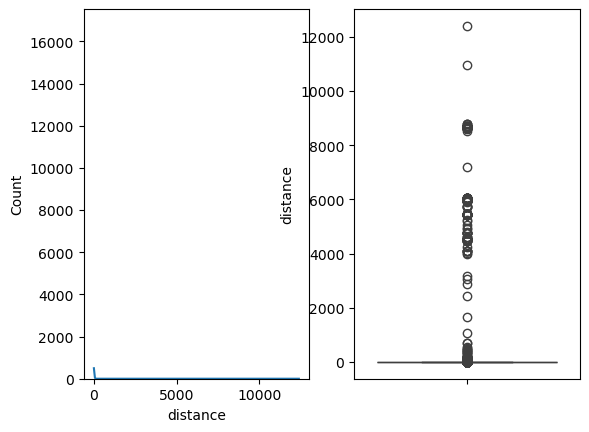

In [23]:
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','jfk_dist','ewr_dist','lga_dist','sol_dist','nyc_dist','bearing'])
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])
    plt.show()

In [24]:
df[df['fare_amount'] <= 1]

,Car_Condition,Weather,Traffic_Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_season,pickup_period
2771,Excellent,cloudy,Flow Traffic,0.01,-1.290480,0.710593,-1.290526,0.710593,1,15,1,5,4,2015,31.849300,38.777384,18.119048,18.402818,11.130760,0.221878,1.553575,Spring,Afternoon
89672,Very Good,sunny,Flow Traffic,0.01,-1.291200,0.711580,-1.291228,0.711597,1,6,19,2,3,2015,44.888499,36.100499,18.327408,21.099647,13.341912,0.171158,0.889904,Winter,Morning
193458,Very Good,cloudy,Flow Traffic,0.01,-1.289633,0.710694,-1.288791,0.709805,2,15,27,2,4,2015,19.206287,51.276508,18.895400,30.616502,24.508688,6.975080,-2.518569,Winter,Afternoon
217169,Excellent,cloudy,Congested Traffic,0.01,-1.291498,0.710802,-1.291499,0.710802,1,16,14,1,2,2015,41.544260,29.804687,23.919553,11.395544,3.028376,0.005049,0.391976,Winter,Afternoon
280110,Good,sunny,Congested Traffic,0.01,-1.287318,0.714322,-1.287318,0.714321,1,21,13,4,0,2015,64.120123,86.677727,38.606312,71.682729,63.261458,0.000424,3.141593,Spring,Evenning


In [25]:
df[(df['fare_amount'] < 1) & (df['distance'] > 1)]

,Car_Condition,Weather,Traffic_Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_season,pickup_period
193458,Very Good,cloudy,Flow Traffic,0.01,-1.289633,0.710694,-1.288791,0.709805,2,15,27,2,4,2015,19.206287,51.276508,18.8954,30.616502,24.508688,6.97508,-2.518569,Winter,Afternoon


In [26]:
indices = df[(df['fare_amount'] < 1) & (df['distance'] > 1)].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)


In [27]:
df[(df['fare_amount'] > 100) & (df['distance'] < 1)] 

,Car_Condition,Weather,Traffic_Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_season,pickup_period
1331,Excellent,rainy,Congested Traffic,180.00,-1.299037,0.706859,-1.299037,0.706859,1,20,16,1,2,2013,114.185443,61.401401,112.369819,77.412336,85.828862,0.000000,0.000000,Winter,Evenning
1479,Excellent,cloudy,Dense Traffic,165.00,-1.285145,0.716152,-1.285150,0.716154,1,21,7,8,4,2009,90.719223,117.550483,69.558533,102.997283,94.576930,0.028489,1.135665,Summer,Evenning
6602,Bad,cloudy,Flow Traffic,128.83,0.000000,0.000000,0.000000,0.000000,1,1,16,5,4,2014,17293.486312,17360.264559,17314.695444,17339.554005,17334.256605,0.000000,0.000000,Spring,Night
20804,Bad,cloudy,Dense Traffic,120.00,-1.287004,0.714821,-1.287004,0.714821,2,17,17,7,5,2010,70.691326,92.976705,45.631835,78.447226,70.058599,0.000000,0.000000,Summer,Evenning
25101,Excellent,stormy,Flow Traffic,135.00,-1.281508,0.711743,-1.281477,0.711796,1,10,16,12,0,2013,67.600721,127.004388,75.535993,106.537049,99.237660,0.366888,-0.420542,Winter,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484782,Bad,windy,Flow Traffic,102.00,-1.292100,0.710822,-1.292100,0.710824,3,16,19,7,1,2011,46.889681,24.300405,29.056336,8.702892,5.179363,0.011119,0.000000,Summer,Afternoon
485103,Excellent,rainy,Flow Traffic,140.00,-1.297698,0.711583,-1.297697,0.711584,1,0,11,5,4,2012,101.010610,35.550402,80.847441,54.994471,59.672520,0.003367,-0.708031,Spring,Night
486667,Very Good,rainy,Dense Traffic,145.00,0.000000,0.000000,0.000000,0.000000,1,6,8,3,5,2014,17293.486312,17360.264559,17314.695444,17339.554005,17334.256605,0.000000,0.000000,Spring,Morning
492669,Very Good,cloudy,Congested Traffic,208.00,-1.301649,0.707991,-1.301649,0.707991,3,6,21,3,5,2015,136.119120,74.856443,128.169686,94.358354,102.175826,0.000000,0.000000,Spring,Morning


In [28]:
indices =df[(df['fare_amount'] > 100) & (df['distance'] < 1)] .index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)


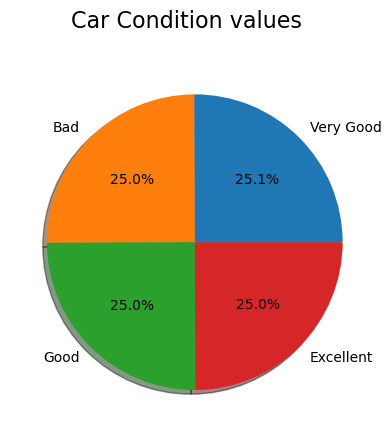

In [29]:
def func(pct):
  return "{:1.1f}%".format(pct)

plt.suptitle("Car Condition values", fontsize=16)

Car_Condition_count = data['Car_Condition'].value_counts()
plt.pie(Car_Condition_count.values,labels=Car_Condition_count.index, autopct=lambda pct: func(pct), shadow=True)
plt.show()

([<matplotlib.patches.Wedge at 0x1b09a727f70>,
 [Text(0.8882881864476411, 0.6488020482532104, 'sunny'),
  Text(-0.3456637890096842, 1.0442780017636437, 'cloudy'),
  Text(-1.0999813253812076, -0.00640966556085164, 'stormy'),
  Text(-0.33411172620053176, -1.0480311800778168, 'rainy'),
  Text(0.8916597823888837, -0.6441605641998033, 'windy')],
 [Text(0.48452082897144055, 0.3538920263199329, '20.1%'),
  Text(-0.18854388491437318, 0.5696061827801693, '20.0%'),
  Text(-0.599989813844295, -0.0034961812150099848, '20.0%'),
  Text(-0.18224275974574458, -0.5716533709515363, '20.0%'),
  Text(0.4863598813030274, -0.3513603077453472, '19.9%')])

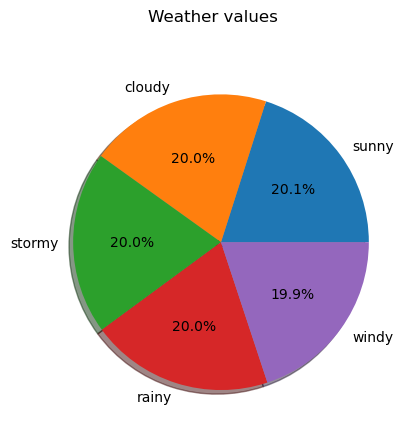

In [30]:

plt.suptitle("Weather values")
Weather_count = data['Weather'].value_counts()
plt.pie(Weather_count.values,labels=Weather_count.index, autopct=lambda pct: func(pct), shadow=True)


([<matplotlib.patches.Wedge at 0x1b09a6bb9a0>,
 [Text(0.5489924237900149, 0.9532089585296419, 'Congested Traffic'),
  Text(-1.0999983577559138, -0.0019007720254760653, 'Dense Traffic'),
  Text(0.5506388141680562, -0.9522588389359256, 'Flow Traffic')],
 [Text(0.29945041297637176, 0.5199321591979865, '33.4%'),
  Text(-0.5999991042304984, -0.0010367847411687627, '33.3%'),
  Text(0.300348444091667, -0.5194139121468685, '33.3%')])

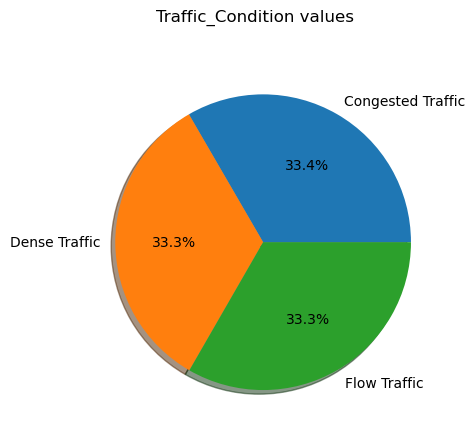

In [31]:
plt.suptitle("Traffic_Condition values")
Traffic_Condition_count = data['Traffic_Condition'].value_counts()
plt.pie(Traffic_Condition_count.values,labels=Traffic_Condition_count.index, autopct=lambda pct: func(pct), shadow=True)


([<matplotlib.patches.Wedge at 0x1b09a78ecd0>,
 [Text(0.7049559854796748, 0.8444152169024317, 'Spring'),
  Text(-0.9058403988497395, 0.6240618333240264, 'Winter'),
  Text(-0.6558369853102782, -0.8831069293687633, 'Summer'),
  Text(0.8188477270289403, -0.7344987405976531, 'Autumn')],
 [Text(0.3845214466252771, 0.4605901183104172, '27.9%'),
  Text(-0.4940947630089488, 0.34039736363128714, '25.1%'),
  Text(-0.3577292647146972, -0.48169468874659815, '23.8%'),
  Text(0.44664421474305827, -0.4006356766896289, '23.3%')])

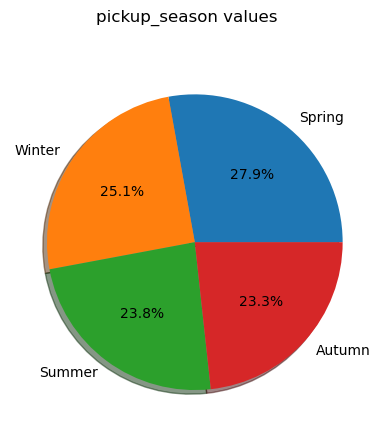

In [32]:
plt.suptitle('pickup_season values')
pickup_season_count = data['pickup_season'].value_counts()
plt.pie(pickup_season_count.values,labels=pickup_season_count.index, autopct=lambda pct: func(pct), shadow=True)



([<matplotlib.patches.Wedge at 0x1b09bb42ca0>,
 [Text(0.6799927929600125, 0.864644320817781, 'Evenning'),
  Text(-0.9226471496433903, 0.598934251195344, 'Morning'),
  Text(-0.6585515232770311, -0.8810844971905375, 'Afternoon'),
  Text(0.817855817991283, -0.7356030593858413, 'Night')],
 [Text(0.3709051597963704, 0.4716241749915168, '28.8%'),
  Text(-0.5032620816236674, 0.32669140974291494, '24.1%'),
  Text(-0.35920992178747146, -0.4805915439221113, '23.8%'),
  Text(0.4461031734497907, -0.401238032392277, '23.3%')])

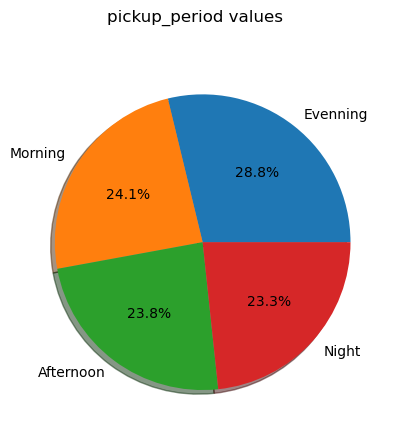

In [33]:
plt.suptitle('pickup_period values')
pickup_period_count = data['pickup_period'].value_counts()
plt.pie(pickup_period_count.values,labels=pickup_period_count.index, autopct=lambda pct: func(pct), shadow=True)


<h4>To handel outliers in distance and fare amount <br>
Drop Large Fare with Small Distance<br>
Drop Small Fare with Large Distance</h4>

In [35]:
p_and_f = df.groupby("year")[['fare_amount']].mean().reset_index().sort_values(by='year')
p_and_f

,year,fare_amount
0,2009,10.007021
1,2010,10.185266
2,2011,10.464689
3,2012,11.137674
4,2013,12.595344
5,2014,12.936023
6,2015,12.995866


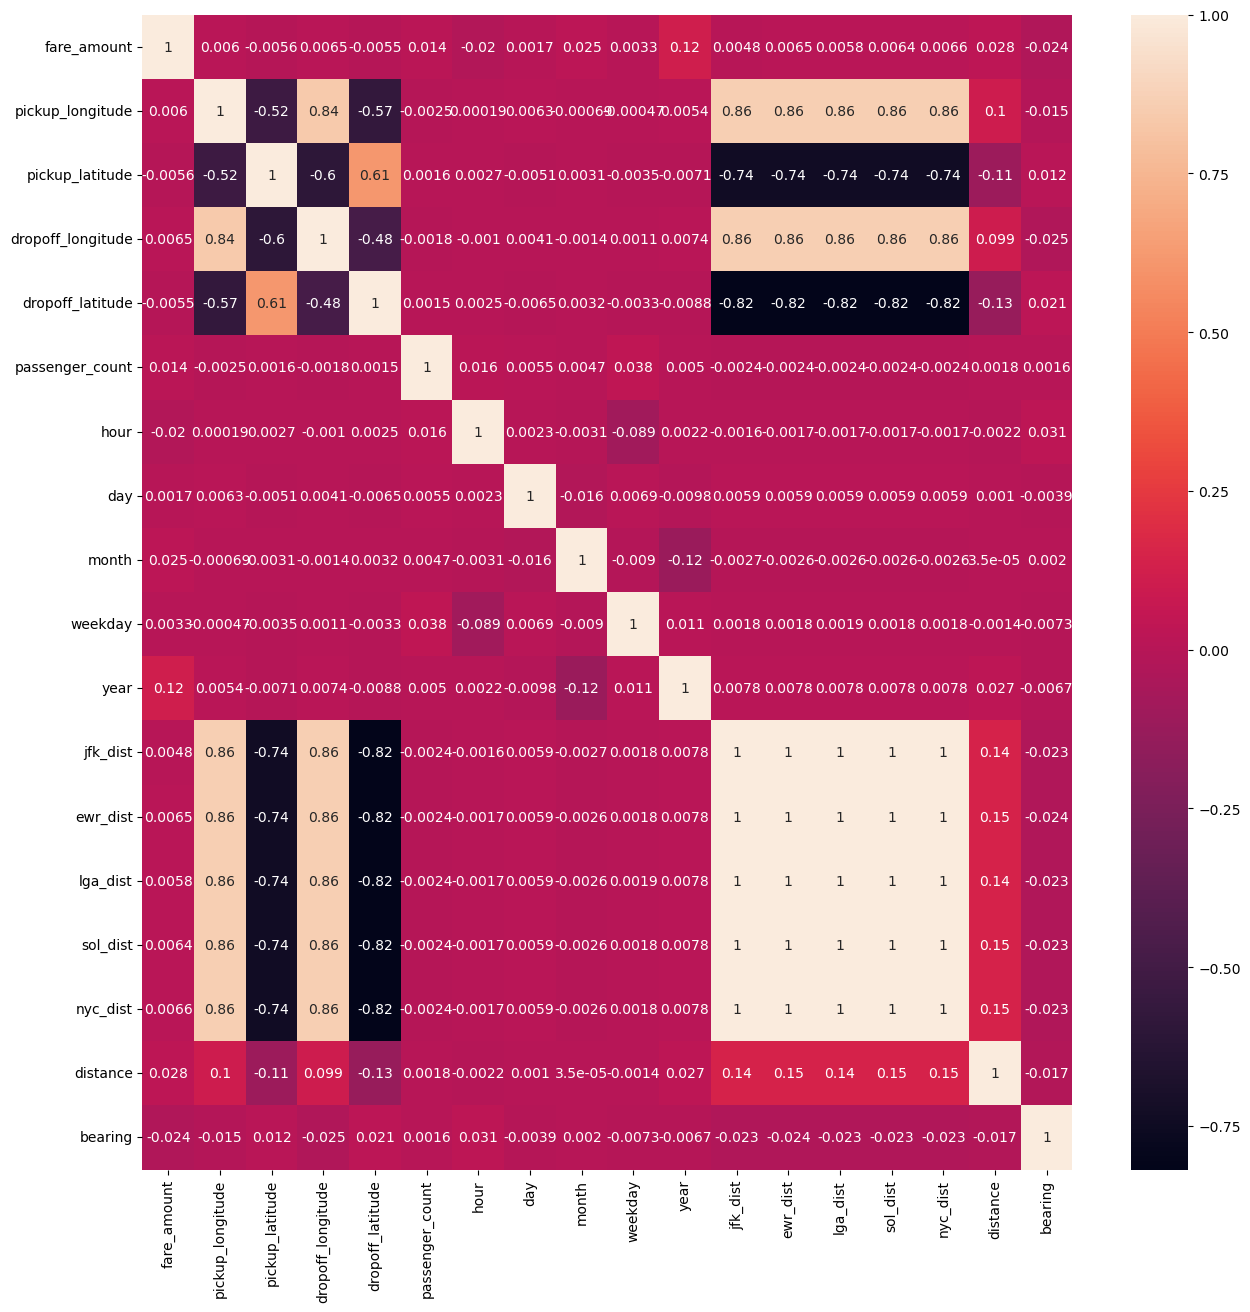

In [36]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [37]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
df.columns

Index(['Car_Condition', 'Weather', 'Traffic_Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'pickup_season', 'pickup_period'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
import joblib  

def encode_and_save_encoders(df, columns_to_encode, encoder_dir="encoders/"):

    import os
    os.makedirs(encoder_dir, exist_ok=True) 

    encoders = {}  
    for col in columns_to_encode:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            encoders[col] = le  
            joblib.dump(le, f"{encoder_dir}{col}_encoder.joblib") 
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")

    return df, encoders

columns_to_encode = ['Car_Condition', 'Weather', 'Traffic_Condition', 'pickup_season', 'pickup_period']

df, fitted_encoders = encode_and_save_encoders(df, columns_to_encode)


In [40]:
X = df.drop(['fare_amount'],axis=1)
y = df['fare_amount']

In [41]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [42]:
std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)

Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)

In [43]:
model=LinearRegression()

In [44]:
model.fit(Train_X,Train_Y)

LinearRegression()

In [45]:
y_pred = model.predict(Test_X)

In [46]:
mse = mean_squared_error(Test_Y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Test_Y, y_pred)
r2 = r2_score(Test_Y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 66.04216065890171
Root Mean Squared Error (RMSE): 8.126632799561065
Mean Absolute Error (MAE): 4.889214288749784
R-squared (R²): 0.2825781939947861


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(Train_X, Train_Y)

RandomForestRegressor(random_state=10)

In [51]:
y_pred_RF = rf_reg.predict(Test_X)

In [71]:
import sklearn.metrics 


In [73]:
rf_reg_MSE = sklearn.metrics.mean_squared_error(Test_Y, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

rf_reg_RMSE = np.sqrt(sklearn.metrics.mean_squared_error(Test_Y, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

rf_reg_MAE = sklearn.metrics.mean_absolute_error(Test_Y, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

r_squared_RF = rf_reg.score(Test_X,Test_Y)
print("R-squared (R²):", r_squared_RF)

Mean Squared Error (MSE): 15.945440696794234
Root Mean Squared Error (RMSE): 3.993174263264031
Mean Absolute Error (MAE): 1.839838596596898
R-squared (R²): 0.8267832737737476


In [75]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)

print("Random Forest model saved as random_forest_model.pkl")

Random Forest model saved as random_forest_model.pkl


In [77]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(std, file)

print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [79]:
X.columns

Index(['Car_Condition', 'Weather', 'Traffic_Condition', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing', 'pickup_season', 'pickup_period'],
      dtype='object')